In [137]:
from google.colab import drive
drive.mount('/content/drive')
#importing the data

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [138]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import numpy as np
import seaborn
  

In [139]:
def Name_Cleaner(vehicle_name):
  if re.search('-/*', vehicle_name): #this confirms that re.search returns something, meaning it will only proceed if the given symbols are encountered in the string.
    pos = re.search('-/*', vehicle_name).start() #the start method here returns the index position at which the pattern or symnol in this case is encountered.
    return vehicle_name[:pos] #this will RETURN the vehicle name by the remaining strings except this pattern.
  else:
    return vehicle_name #this will return the original name if the pattern is not encountered.

In [140]:
path= "/content/drive/MyDrive/Motor_Vehicle_Collisions_-_Vehicles (1).csv"
org_data = pd.read_csv(path)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [141]:
org_data_copy= org_data

In [142]:
org_data_copy

,UNIQUE_ID,COLLISION_ID,CRASH_DATE,CRASH_TIME,VEHICLE_ID,STATE_REGISTRATION,VEHICLE_TYPE,VEHICLE_MAKE,VEHICLE_MODEL,VEHICLE_YEAR,...,PRE_CRASH,POINT_OF_IMPACT,VEHICLE_DAMAGE,VEHICLE_DAMAGE_1,VEHICLE_DAMAGE_2,VEHICLE_DAMAGE_3,PUBLIC_PROPERTY_DAMAGE,PUBLIC_PROPERTY_DAMAGE_TYPE,CONTRIBUTING_FACTOR_1,CONTRIBUTING_FACTOR_2
0,10385780,100201,09/07/2012,9:03,1,NY,PASSENGER VEHICLE,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unspecified,NaN
1,19140702,4213082,09/23/2019,8:15,0553ab4d-9500-4cba-8d98-f4d7f89d5856,NY,Station Wagon/Sport Utility Vehicle,TOYT -CAR/SUV,NaN,2002.0,...,Going Straight Ahead,Left Front Bumper,Left Front Quarter Panel,NaN,NaN,NaN,N,NaN,Driver Inattention/Distraction,Unspecified
2,14887647,3307608,10/02/2015,17:18,2,NY,TAXI,NaN,NaN,NaN,...,Going Straight Ahead,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Driver Inattention/Distraction,NaN
3,14889754,3308693,10/04/2015,20:34,1,NY,PASSENGER VEHICLE,NaN,NaN,NaN,...,Parked,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unspecified,NaN
4,14400270,297666,04/25/2013,21:15,1,NY,PASSENGER VEHICLE,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Other Vehicular,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3704401,20107423,4477591,11/15/2021,8:40,beb4bb74-d34d-45ac-9490-98ba62845101,PA,Station Wagon/Sport Utility Vehicle,FORD -CAR/SUV,NaN,2021.0,...,Going Straight Ahead,Right Front Quarter Panel,Right Side Doors,No Damage,No Damage,No Damage,N,NaN,Unspecified,Unspecified
3704402,20116373,4481414,11/24/2021,13:55,973d9175-ebbe-48f9-8a2e-1ae605c34dd2,NY,Station Wagon/Sport Utility Vehicle,CHEV -CAR/SUV,NaN,2012.0,...,Parked,Center Back End,Center Back End,Left Rear Bumper,Left Rear Quarter Panel,NaN,N,NaN,Unspecified,Unspecified
3704403,20105181,4476575,11/11/2021,14:20,3a617316-bf31-4226-8e57-755af0c97706,NJ,Station Wagon/Sport Utility Vehicle,NISS -CAR/SUV,NaN,2007.0,...,Parked,Left Front Quarter Panel,Left Front Quarter Panel,Left Side Doors,Right Front Quarter Panel,NaN,N,NaN,Unspecified,Unspecified
3704404,20101210,4474811,11/06/2021,12:30,b7e355b1-6fb8-47bf-87be-55c0c45282f4,NY,Sedan,FORD -CAR/SUV,NaN,2018.0,...,Going Straight Ahead,Center Front End,Center Front End,Left Front Bumper,Right Front Bumper,Left Front Quarter Panel,N,NaN,Driver Inattention/Distraction,Following Too Closely


In [143]:
org_data['CRASH_DATE']=pd.to_datetime(org_data['CRASH_DATE'])

In [144]:
start_date= '2019-09-01'
end_date='2021-08-31'

daterange=org_data.query('CRASH_DATE>= @start_date and CRASH_DATE<=@end_date')
daterange.to_csv('/content/drive/MyDrive/daterange.csv')

In [145]:
data_to_use=pd.read_csv('/content/drive/MyDrive/daterange.csv')
#to read

In [146]:
data_to_use['CRASH_DATE']=pd.to_datetime(data_to_use['CRASH_DATE'])
data_to_use['YEAR'],data_to_use['MONTH']=data_to_use['CRASH_DATE'].dt.year,data_to_use['CRASH_DATE'].dt.month
#this would create two additional columns of date and month

In [147]:
data_to_use

,Unnamed: 0,UNIQUE_ID,COLLISION_ID,CRASH_DATE,CRASH_TIME,VEHICLE_ID,STATE_REGISTRATION,VEHICLE_TYPE,VEHICLE_MAKE,VEHICLE_MODEL,...,VEHICLE_DAMAGE,VEHICLE_DAMAGE_1,VEHICLE_DAMAGE_2,VEHICLE_DAMAGE_3,PUBLIC_PROPERTY_DAMAGE,PUBLIC_PROPERTY_DAMAGE_TYPE,CONTRIBUTING_FACTOR_1,CONTRIBUTING_FACTOR_2,YEAR,MONTH
0,1,19140702,4213082,2019-09-23,8:15,0553ab4d-9500-4cba-8d98-f4d7f89d5856,NY,Station Wagon/Sport Utility Vehicle,TOYT -CAR/SUV,NaN,...,Left Front Quarter Panel,NaN,NaN,NaN,N,NaN,Driver Inattention/Distraction,Unspecified,2019,9
1,6,19138701,4229067,2019-10-24,13:15,c53b43d9-419a-4ab1-9361-3f2979078d89,NY,Bus,FRHT-TRUCK/BUS,NaN,...,Left Front Quarter Panel,NaN,NaN,NaN,N,NaN,Unspecified,Unspecified,2019,10
2,13,19140791,4229563,2019-10-21,17:55,86a294b4-6672-4a7e-8357-39d6d2eff9f7,PA,Sedan,BMW -CAR/SUV,NaN,...,Right Front Bumper,Right Front Quarter Panel,Right Front Bumper,NaN,N,NaN,Unspecified,Unspecified,2019,10
3,14,19694316,4322767,2020-06-06,18:30,fdc195a7-8127-4c00-834d-bac78b0cf88e,NaN,Bike,NaN,NaN,...,No Damage,No Damage,No Damage,No Damage,N,NaN,Traffic Control Disregarded,Unspecified,2020,6
4,19,19140656,4229538,2019-10-24,17:30,70e5262a-bd27-48a6-99a1-1ec659804088,NY,Station Wagon/Sport Utility Vehicle,JEEP -CAR/SUV,NaN,...,Left Rear Quarter Panel,NaN,NaN,NaN,N,NaN,Unspecified,Unspecified,2019,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
519485,3703358,20119440,4483137,2020-12-01,17:00,c506ec65-9ead-4d96-9558-f803a369d0f3,NY,Sedan,HOND -CAR/SUV,NaN,...,Right Front Quarter Panel,Right Front Bumper,Right Front Quarter Panel,Right Front Bumper,N,NaN,Unspecified,Unspecified,2020,12
519486,3703395,20117944,4482288,2021-08-14,8:21,72dc146c-0a7a-47db-ade2-817939bb151c,PA,Sedan,HOND -CAR/SUV,NaN,...,Center Front End,Left Front Quarter Panel,No Damage,No Damage,N,NaN,Unspecified,Unspecified,2021,8
519487,3703534,20119740,4407071,2021-04-13,13:50,26af0548-3858-4b19-bd7f-a8f7cb5f2ca5,NY,Sedan,CHEV -CAR/SUV,NaN,...,Center Front End,NaN,NaN,NaN,N,NaN,Illnes,Unspecified,2021,4
519488,3703780,20112133,4479833,2019-11-19,1:50,47038248-eddf-458e-a0e2-02cb7609329c,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Unspecified,NaN,NaN,NaN,2019,11


In [148]:
data1=data_to_use
data1=data1.dropna(subset=['VEHICLE_MAKE'])

In [149]:
data1

,Unnamed: 0,UNIQUE_ID,COLLISION_ID,CRASH_DATE,CRASH_TIME,VEHICLE_ID,STATE_REGISTRATION,VEHICLE_TYPE,VEHICLE_MAKE,VEHICLE_MODEL,...,VEHICLE_DAMAGE,VEHICLE_DAMAGE_1,VEHICLE_DAMAGE_2,VEHICLE_DAMAGE_3,PUBLIC_PROPERTY_DAMAGE,PUBLIC_PROPERTY_DAMAGE_TYPE,CONTRIBUTING_FACTOR_1,CONTRIBUTING_FACTOR_2,YEAR,MONTH
0,1,19140702,4213082,2019-09-23,8:15,0553ab4d-9500-4cba-8d98-f4d7f89d5856,NY,Station Wagon/Sport Utility Vehicle,TOYT -CAR/SUV,NaN,...,Left Front Quarter Panel,NaN,NaN,NaN,N,NaN,Driver Inattention/Distraction,Unspecified,2019,9
1,6,19138701,4229067,2019-10-24,13:15,c53b43d9-419a-4ab1-9361-3f2979078d89,NY,Bus,FRHT-TRUCK/BUS,NaN,...,Left Front Quarter Panel,NaN,NaN,NaN,N,NaN,Unspecified,Unspecified,2019,10
2,13,19140791,4229563,2019-10-21,17:55,86a294b4-6672-4a7e-8357-39d6d2eff9f7,PA,Sedan,BMW -CAR/SUV,NaN,...,Right Front Bumper,Right Front Quarter Panel,Right Front Bumper,NaN,N,NaN,Unspecified,Unspecified,2019,10
4,19,19140656,4229538,2019-10-24,17:30,70e5262a-bd27-48a6-99a1-1ec659804088,NY,Station Wagon/Sport Utility Vehicle,JEEP -CAR/SUV,NaN,...,Left Rear Quarter Panel,NaN,NaN,NaN,N,NaN,Unspecified,Unspecified,2019,10
5,20,19139721,4228839,2019-10-24,16:00,5bb0b59a-ce74-4a04-9f92-1446ebfe4f46,NC,Sedan,TOYT -CAR/SUV,NaN,...,Right Side Doors,NaN,NaN,NaN,N,NaN,Unspecified,Unspecified,2019,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
519483,3703130,20110046,4348793,2020-09-11,12:45,6684c747-e685-4a03-9e2b-22783d4c2e80,NY,Pick-up Truck,CHEV -CAR/SUV,NaN,...,Left Front Quarter Panel,Left Side Doors,Left Front Bumper,Center Front End,N,NaN,Unspecified,Unspecified,2020,9
519485,3703358,20119440,4483137,2020-12-01,17:00,c506ec65-9ead-4d96-9558-f803a369d0f3,NY,Sedan,HOND -CAR/SUV,NaN,...,Right Front Quarter Panel,Right Front Bumper,Right Front Quarter Panel,Right Front Bumper,N,NaN,Unspecified,Unspecified,2020,12
519486,3703395,20117944,4482288,2021-08-14,8:21,72dc146c-0a7a-47db-ade2-817939bb151c,PA,Sedan,HOND -CAR/SUV,NaN,...,Center Front End,Left Front Quarter Panel,No Damage,No Damage,N,NaN,Unspecified,Unspecified,2021,8
519487,3703534,20119740,4407071,2021-04-13,13:50,26af0548-3858-4b19-bd7f-a8f7cb5f2ca5,NY,Sedan,CHEV -CAR/SUV,NaN,...,Center Front End,NaN,NaN,NaN,N,NaN,Illnes,Unspecified,2021,4


In [150]:
data1.isna().sum()

Unnamed: 0                          0
UNIQUE_ID                           0
COLLISION_ID                        0
CRASH_DATE                          0
CRASH_TIME                          0
VEHICLE_ID                          0
STATE_REGISTRATION               5670
VEHICLE_TYPE                     4467
VEHICLE_MAKE                        0
VEHICLE_MODEL                  435521
VEHICLE_YEAR                    12460
TRAVEL_DIRECTION                 2601
VEHICLE_OCCUPANTS               10022
DRIVER_SEX                      99324
DRIVER_LICENSE_STATUS          107282
DRIVER_LICENSE_JURISDICTION    108239
PRE_CRASH                        4372
POINT_OF_IMPACT                  4488
VEHICLE_DAMAGE                   6639
VEHICLE_DAMAGE_1               142329
VEHICLE_DAMAGE_2               213439
VEHICLE_DAMAGE_3               269544
PUBLIC_PROPERTY_DAMAGE              0
PUBLIC_PROPERTY_DAMAGE_TYPE    435521
CONTRIBUTING_FACTOR_1            2284
CONTRIBUTING_FACTOR_2            3811
YEAR        

In [151]:
data1['VEHICLE_MAKE']= data1['VEHICLE_MAKE'].apply(Name_Cleaner)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [152]:
data1

,Unnamed: 0,UNIQUE_ID,COLLISION_ID,CRASH_DATE,CRASH_TIME,VEHICLE_ID,STATE_REGISTRATION,VEHICLE_TYPE,VEHICLE_MAKE,VEHICLE_MODEL,...,VEHICLE_DAMAGE,VEHICLE_DAMAGE_1,VEHICLE_DAMAGE_2,VEHICLE_DAMAGE_3,PUBLIC_PROPERTY_DAMAGE,PUBLIC_PROPERTY_DAMAGE_TYPE,CONTRIBUTING_FACTOR_1,CONTRIBUTING_FACTOR_2,YEAR,MONTH
0,1,19140702,4213082,2019-09-23,8:15,0553ab4d-9500-4cba-8d98-f4d7f89d5856,NY,Station Wagon/Sport Utility Vehicle,TOYT,NaN,...,Left Front Quarter Panel,NaN,NaN,NaN,N,NaN,Driver Inattention/Distraction,Unspecified,2019,9
1,6,19138701,4229067,2019-10-24,13:15,c53b43d9-419a-4ab1-9361-3f2979078d89,NY,Bus,FRHT,NaN,...,Left Front Quarter Panel,NaN,NaN,NaN,N,NaN,Unspecified,Unspecified,2019,10
2,13,19140791,4229563,2019-10-21,17:55,86a294b4-6672-4a7e-8357-39d6d2eff9f7,PA,Sedan,BMW,NaN,...,Right Front Bumper,Right Front Quarter Panel,Right Front Bumper,NaN,N,NaN,Unspecified,Unspecified,2019,10
4,19,19140656,4229538,2019-10-24,17:30,70e5262a-bd27-48a6-99a1-1ec659804088,NY,Station Wagon/Sport Utility Vehicle,JEEP,NaN,...,Left Rear Quarter Panel,NaN,NaN,NaN,N,NaN,Unspecified,Unspecified,2019,10
5,20,19139721,4228839,2019-10-24,16:00,5bb0b59a-ce74-4a04-9f92-1446ebfe4f46,NC,Sedan,TOYT,NaN,...,Right Side Doors,NaN,NaN,NaN,N,NaN,Unspecified,Unspecified,2019,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
519483,3703130,20110046,4348793,2020-09-11,12:45,6684c747-e685-4a03-9e2b-22783d4c2e80,NY,Pick-up Truck,CHEV,NaN,...,Left Front Quarter Panel,Left Side Doors,Left Front Bumper,Center Front End,N,NaN,Unspecified,Unspecified,2020,9
519485,3703358,20119440,4483137,2020-12-01,17:00,c506ec65-9ead-4d96-9558-f803a369d0f3,NY,Sedan,HOND,NaN,...,Right Front Quarter Panel,Right Front Bumper,Right Front Quarter Panel,Right Front Bumper,N,NaN,Unspecified,Unspecified,2020,12
519486,3703395,20117944,4482288,2021-08-14,8:21,72dc146c-0a7a-47db-ade2-817939bb151c,PA,Sedan,HOND,NaN,...,Center Front End,Left Front Quarter Panel,No Damage,No Damage,N,NaN,Unspecified,Unspecified,2021,8
519487,3703534,20119740,4407071,2021-04-13,13:50,26af0548-3858-4b19-bd7f-a8f7cb5f2ca5,NY,Sedan,CHEV,NaN,...,Center Front End,NaN,NaN,NaN,N,NaN,Illnes,Unspecified,2021,4


In [153]:
print(data1.columns.get_loc('VEHICLE_MAKE'))
print(data1.columns.get_loc('YEAR'))
print(data1.columns.get_loc('MONTH'))

8
26
27


In [154]:
cols=[8,26,27]
Data=data1[data1.columns[cols]]

In [155]:
Data

,VEHICLE_MAKE,YEAR,MONTH
0,TOYT,2019,9
1,FRHT,2019,10
2,BMW,2019,10
4,JEEP,2019,10
5,TOYT,2019,10
...,...,...,...
519483,CHEV,2020,9
519485,HOND,2020,12
519486,HOND,2021,8
519487,CHEV,2021,4


Query-1 Bar Chart

In [156]:
Data['VEHICLE_MAKE']=Data['VEHICLE_MAKE'].str.replace(' ','')
Data['YEAR']=Data['YEAR'].replace(' ','')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [157]:
mydata=Data[(Data['VEHICLE_MAKE'] == 'NISS') | (Data['VEHICLE_MAKE'] == 'SUBA')|(Data['VEHICLE_MAKE'] == 'BMW')|(Data['VEHICLE_MAKE'] == 'AUDI')]

In [158]:
mydata

,VEHICLE_MAKE,YEAR,MONTH
2,BMW,2019,10
6,NISS,2019,10
17,NISS,2019,10
19,NISS,2019,10
33,NISS,2019,10
...,...,...,...
519419,NISS,2021,5
519431,NISS,2020,12
519453,BMW,2020,11
519470,BMW,2021,6


In [159]:
mydata.insert(1,'counter','1')

In [160]:
mydata

,VEHICLE_MAKE,counter,YEAR,MONTH
2,BMW,1,2019,10
6,NISS,1,2019,10
17,NISS,1,2019,10
19,NISS,1,2019,10
33,NISS,1,2019,10
...,...,...,...,...
519419,NISS,1,2021,5
519431,NISS,1,2020,12
519453,BMW,1,2020,11
519470,BMW,1,2021,6


In [161]:
mydata.groupby(['VEHICLE_MAKE','YEAR'])[['counter']].count()

counter
VEHICLE_MAKE YEAR         
AUDI         2019     1440
             2020     2345
             2021     1590
BMW          2019     4096
             2020     7630
             2021     5312
NISS         2019    12599
             2020    20339
             2021    12264
SUBA         2019     1883
             2020     2875
             2021     1784

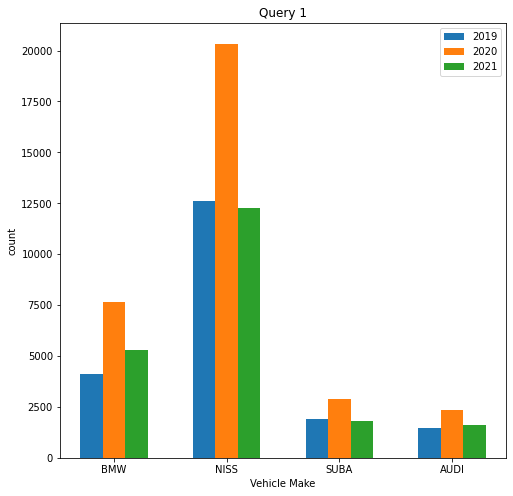

In [162]:
X = ['BMW','NISS','SUBA','AUDI']
y_2019=[4096,12599,1883,1440]
y_2020=[7630,20339,2875,2345]
y_2021=[5312,12264,1784,1590]

X_axis=np.arange(len(X))

plt.bar(X_axis - 0.2,  y_2019, 0.2, 
	label = '2019')
plt.bar(X_axis ,  y_2020, 0.2, 
	label = '2020')
plt.bar(X_axis+0.2,y_2021,0.2,
        label='2021')
  
plt.xticks(X_axis, X)
plt.xlabel("Vehicle Make")
plt.ylabel("count")
plt.title("Query 1")
plt.legend()
plt.show()

Query-2 Line Chart

In [163]:
data_to_use=pd.read_csv('/content/drive/MyDrive/daterange.csv')

In [164]:
print(data_to_use)

        Unnamed: 0  UNIQUE_ID  COLLISION_ID  CRASH_DATE CRASH_TIME  \
0                1   19140702       4213082  2019-09-23       8:15   
1                6   19138701       4229067  2019-10-24      13:15   
2               13   19140791       4229563  2019-10-21      17:55   
3               14   19694316       4322767  2020-06-06      18:30   
4               19   19140656       4229538  2019-10-24      17:30   
...            ...        ...           ...         ...        ...   
519485     3703358   20119440       4483137  2020-12-01      17:00   
519486     3703395   20117944       4482288  2021-08-14       8:21   
519487     3703534   20119740       4407071  2021-04-13      13:50   
519488     3703780   20112133       4479833  2019-11-19       1:50   
519489     3703847   20119741       4407071  2021-04-13      13:50   

                                  VEHICLE_ID STATE_REGISTRATION  \
0       0553ab4d-9500-4cba-8d98-f4d7f89d5856                 NY   
1       c53b43d9-419a-4ab

In [165]:
data_to_use=data_to_use.dropna(subset=['VEHICLE_MAKE'])

In [166]:
data_to_use['VEHICLE_MAKE']= data_to_use['VEHICLE_MAKE'].apply(Name_Cleaner)

In [167]:
data_to_use

,Unnamed: 0,UNIQUE_ID,COLLISION_ID,CRASH_DATE,CRASH_TIME,VEHICLE_ID,STATE_REGISTRATION,VEHICLE_TYPE,VEHICLE_MAKE,VEHICLE_MODEL,...,PRE_CRASH,POINT_OF_IMPACT,VEHICLE_DAMAGE,VEHICLE_DAMAGE_1,VEHICLE_DAMAGE_2,VEHICLE_DAMAGE_3,PUBLIC_PROPERTY_DAMAGE,PUBLIC_PROPERTY_DAMAGE_TYPE,CONTRIBUTING_FACTOR_1,CONTRIBUTING_FACTOR_2
0,1,19140702,4213082,2019-09-23,8:15,0553ab4d-9500-4cba-8d98-f4d7f89d5856,NY,Station Wagon/Sport Utility Vehicle,TOYT,NaN,...,Going Straight Ahead,Left Front Bumper,Left Front Quarter Panel,NaN,NaN,NaN,N,NaN,Driver Inattention/Distraction,Unspecified
1,6,19138701,4229067,2019-10-24,13:15,c53b43d9-419a-4ab1-9361-3f2979078d89,NY,Bus,FRHT,NaN,...,Parked,Left Front Quarter Panel,Left Front Quarter Panel,NaN,NaN,NaN,N,NaN,Unspecified,Unspecified
2,13,19140791,4229563,2019-10-21,17:55,86a294b4-6672-4a7e-8357-39d6d2eff9f7,PA,Sedan,BMW,NaN,...,Going Straight Ahead,Center Front End,Right Front Bumper,Right Front Quarter Panel,Right Front Bumper,NaN,N,NaN,Unspecified,Unspecified
4,19,19140656,4229538,2019-10-24,17:30,70e5262a-bd27-48a6-99a1-1ec659804088,NY,Station Wagon/Sport Utility Vehicle,JEEP,NaN,...,Going Straight Ahead,Left Rear Quarter Panel,Left Rear Quarter Panel,NaN,NaN,NaN,N,NaN,Unspecified,Unspecified
5,20,19139721,4228839,2019-10-24,16:00,5bb0b59a-ce74-4a04-9f92-1446ebfe4f46,NC,Sedan,TOYT,NaN,...,Going Straight Ahead,Right Side Doors,Right Side Doors,NaN,NaN,NaN,N,NaN,Unspecified,Unspecified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
519483,3703130,20110046,4348793,2020-09-11,12:45,6684c747-e685-4a03-9e2b-22783d4c2e80,NY,Pick-up Truck,CHEV,NaN,...,Parked,Left Front Quarter Panel,Left Front Quarter Panel,Left Side Doors,Left Front Bumper,Center Front End,N,NaN,Unspecified,Unspecified
519485,3703358,20119440,4483137,2020-12-01,17:00,c506ec65-9ead-4d96-9558-f803a369d0f3,NY,Sedan,HOND,NaN,...,Parked,Right Front Bumper,Right Front Quarter Panel,Right Front Bumper,Right Front Quarter Panel,Right Front Bumper,N,NaN,Unspecified,Unspecified
519486,3703395,20117944,4482288,2021-08-14,8:21,72dc146c-0a7a-47db-ade2-817939bb151c,PA,Sedan,HOND,NaN,...,Going Straight Ahead,Center Front End,Center Front End,Left Front Quarter Panel,No Damage,No Damage,N,NaN,Unspecified,Unspecified
519487,3703534,20119740,4407071,2021-04-13,13:50,26af0548-3858-4b19-bd7f-a8f7cb5f2ca5,NY,Sedan,CHEV,NaN,...,Going Straight Ahead,Center Front End,Center Front End,NaN,NaN,NaN,N,NaN,Illnes,Unspecified


In [168]:
data_to_use['CRASH_DATE']=pd.to_datetime(data_to_use['CRASH_DATE'])
data_to_use['YEAR'],data_to_use['MONTH']=data_to_use['CRASH_DATE'].dt.year,data_to_use['CRASH_DATE'].dt.month
#this would create two additional columns of date and month

In [169]:
print(data_to_use.columns.get_loc('VEHICLE_MAKE'))
print(data_to_use.columns.get_loc('MONTH'))
print(data_to_use.columns.get_loc('YEAR'))

8
27
26


In [170]:
cols2=[8,27,26]
q_2=data_to_use[data_to_use.columns[cols2]]

In [171]:
q_2

,VEHICLE_MAKE,MONTH,YEAR
0,TOYT,9,2019
1,FRHT,10,2019
2,BMW,10,2019
4,JEEP,10,2019
5,TOYT,10,2019
...,...,...,...
519483,CHEV,9,2020
519485,HOND,12,2020
519486,HOND,8,2021
519487,CHEV,4,2021


In [172]:
q_2['VEHICLE_MAKE']=q_2['VEHICLE_MAKE'].str.replace(' ','')
q_2['YEAR']=q_2['YEAR'].replace(' ','')
q_2['MONTH']=q_2['MONTH'].replace(' ','')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [173]:
q_2['MONTH']=q_2['MONTH'].replace(1,'Jan')
q_2['MONTH']=q_2['MONTH'].replace(2,'Feb')
q_2['MONTH']=q_2['MONTH'].replace(3,'Mar')
q_2['MONTH']=q_2['MONTH'].replace(4,'Apr')
q_2['MONTH']=q_2['MONTH'].replace(5,'May')
q_2['MONTH']=q_2['MONTH'].replace(6,'Jun')
q_2['MONTH']=q_2['MONTH'].replace(7,'Jul')
q_2['MONTH']=q_2['MONTH'].replace(8,'Aug')
q_2['MONTH']=q_2['MONTH'].replace(9,'Sept')
q_2['MONTH']=q_2['MONTH'].replace(10,'Oct')
q_2['MONTH']=q_2['MONTH'].replace(11,'Nov')
q_2['MONTH']=q_2['MONTH'].replace(12,'Dec')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [174]:
q_2

,VEHICLE_MAKE,MONTH,YEAR
0,TOYT,Sept,2019
1,FRHT,Oct,2019
2,BMW,Oct,2019
4,JEEP,Oct,2019
5,TOYT,Oct,2019
...,...,...,...
519483,CHEV,Sept,2020
519485,HOND,Dec,2020
519486,HOND,Aug,2021
519487,CHEV,Apr,2021


In [175]:
q_2=q_2[(q_2['VEHICLE_MAKE'] == 'NISS') | (q_2['VEHICLE_MAKE'] == 'SUBA')|(q_2['VEHICLE_MAKE'] == 'BMW')|(q_2['VEHICLE_MAKE'] == 'AUDI')]

In [176]:
n = len(pd.unique(q_2['MONTH']))
print(n)

12


In [177]:
q_2_2019_BMW=q_2[(q_2['YEAR']== 2019) & (q_2['VEHICLE_MAKE']=='BMW')]
q_2_2019_NISS=q_2[(q_2['YEAR']==2019)&(q_2['VEHICLE_MAKE']=='NISS')]
q_2_2019_AUDI=q_2[(q_2['YEAR']==2019)&(q_2['VEHICLE_MAKE']=='AUDI')]
q_2_2019_SUBA=q_2[(q_2['YEAR']==2019)&(q_2['VEHICLE_MAKE']=='SUBA')]

q_2_2020_BMW=q_2[(q_2['YEAR']== 2020) & (q_2['VEHICLE_MAKE']=='BMW')]
q_2_2020_NISS=q_2[(q_2['YEAR']== 2020) & (q_2['VEHICLE_MAKE']=='NISS')]
q_2_2020_AUDI=q_2[(q_2['YEAR']== 2020) & (q_2['VEHICLE_MAKE']=='AUDI')]
q_2_2020_SUBA=q_2[(q_2['YEAR']== 2020) & (q_2['VEHICLE_MAKE']=='SUBA')]

q_2_2021_BMW=q_2[(q_2['YEAR']== 2021) & (q_2['VEHICLE_MAKE']=='BMW')]
q_2_2021_NISS=q_2[(q_2['YEAR']== 2021) & (q_2['VEHICLE_MAKE']=='NISS')]
q_2_2021_AUDI=q_2[(q_2['YEAR']== 2021) & (q_2['VEHICLE_MAKE']=='AUDI')]
q_2_2021_SUBA=q_2[(q_2['YEAR']== 2021) & (q_2['VEHICLE_MAKE']=='SUBA')]

In [178]:
q_2_2020_BMW.insert(3,'count',1)
q_2_2020_NISS.insert(3,'count',1)
q_2_2020_AUDI.insert(3,'count',1)
q_2_2020_SUBA.insert(3,'count',1)

q_2_2021_BMW.insert(3,'count',1)
q_2_2021_NISS.insert(3,'count',1)
q_2_2021_AUDI.insert(3,'count',1)
q_2_2021_SUBA.insert(3,'count',1)

q_2_2019_BMW.insert(3,'count',1)
q_2_2019_NISS.insert(3,'count',1)
q_2_2019_AUDI.insert(3,'count',1)
q_2_2019_SUBA.insert(3,'count',1)


In [179]:
print(q_2_2020_BMW,q_2_2020_NISS,q_2_2020_AUDI,q_2_2020_SUBA)

       VEHICLE_MAKE MONTH  YEAR  count
909             BMW   Nov  2020      1
938             BMW   Jun  2020      1
955             BMW   Jun  2020      1
981             BMW   Jun  2020      1
997             BMW   Jun  2020      1
...             ...   ...   ...    ...
474085          BMW   May  2020      1
475082          BMW   Dec  2020      1
492460          BMW   Jul  2020      1
519346          BMW   Aug  2020      1
519453          BMW   Nov  2020      1

[7630 rows x 4 columns]        VEHICLE_MAKE MONTH  YEAR  count
880            NISS   Jun  2020      1
884            NISS   Jun  2020      1
891            NISS   Jun  2020      1
895            NISS   Jun  2020      1
899            NISS   Jun  2020      1
...             ...   ...   ...    ...
516887         NISS   Oct  2020      1
518786         NISS   Jan  2020      1
518933         NISS   Dec  2020      1
519015         NISS  Sept  2020      1
519431         NISS   Dec  2020      1

[20339 rows x 4 columns]        VEHICL

In [180]:
print(q_2_2021_BMW,q_2_2021_NISS,q_2_2021_AUDI,q_2_2021_SUBA)

       VEHICLE_MAKE MONTH  YEAR  count
367321          BMW   Jan  2021      1
367329          BMW   Jan  2021      1
367416          BMW   Jan  2021      1
367490          BMW   Jan  2021      1
367695          BMW   Jan  2021      1
...             ...   ...   ...    ...
519208          BMW   May  2021      1
519213          BMW   May  2021      1
519235          BMW   Jun  2021      1
519318          BMW   Jul  2021      1
519470          BMW   Jun  2021      1

[5312 rows x 4 columns]        VEHICLE_MAKE MONTH  YEAR  count
367279         NISS   Jan  2021      1
367300         NISS   Jan  2021      1
367334         NISS   Jan  2021      1
367385         NISS   Jan  2021      1
367445         NISS   Jan  2021      1
...             ...   ...   ...    ...
519308         NISS   Apr  2021      1
519334         NISS   Aug  2021      1
519415         NISS   Jul  2021      1
519419         NISS   May  2021      1
519481         NISS   Apr  2021      1

[12264 rows x 4 columns]        VEHICL

In [181]:
n1 = len(pd.unique(q_2_2019_BMW['MONTH']))
n2= len(pd.unique(q_2_2019_NISS['MONTH']))
n3= len(pd.unique(q_2_2019_AUDI['MONTH']))
n4= len(pd.unique(q_2_2019_SUBA['MONTH']))
print(n1,n2,n3,n4)

4 4 4 4


In [182]:
m1 = len(pd.unique(q_2_2020_BMW['MONTH']))
m2= len(pd.unique(q_2_2020_NISS['MONTH']))
m3= len(pd.unique(q_2_2020_AUDI['MONTH']))
m4= len(pd.unique(q_2_2020_SUBA['MONTH']))
print(m1,m2,m3,m4)

12 12 12 12


In [183]:
l1 = len(pd.unique(q_2_2021_BMW['MONTH']))
l2= len(pd.unique(q_2_2021_NISS['MONTH']))
l3= len(pd.unique(q_2_2021_AUDI['MONTH']))
l4= len(pd.unique(q_2_2021_SUBA['MONTH']))
print(l1,l2,l3,l4)

8 8 8 8


In [184]:
q21=q_2_2019_BMW.groupby(['MONTH'])[['count']].count()

In [185]:
q31=q_2_2020_BMW.groupby(['MONTH'])[['count']].count()
q32=q_2_2020_NISS.groupby(['MONTH'])[['count']].count()
q33=q_2_2020_AUDI.groupby(['MONTH'])[['count']].count()
q34=q_2_2020_SUBA.groupby(['MONTH'])[['count']].count()

In [186]:
q41=q_2_2021_BMW.groupby(['MONTH'])[['count']].count()
q42=q_2_2021_NISS.groupby(['MONTH'])[['count']].count()
q43=q_2_2021_AUDI.groupby(['MONTH'])[['count']].count()
q44=q_2_2021_SUBA.groupby(['MONTH'])[['count']].count()

In [187]:
q22=q_2_2019_NISS.groupby(['MONTH'])[['count']].count()
q23=q_2_2019_AUDI.groupby(['MONTH'])[['count']].count()
q24=q_2_2019_SUBA.groupby(['MONTH'])[['count']].count()

In [188]:
print(q21)
print(q22)
print(q23)
print(q24)

       count
MONTH       
Dec      999
Nov      997
Oct     1114
Sept     986
       count
MONTH       
Dec     3151
Nov     3089
Oct     3130
Sept    3229
       count
MONTH       
Dec      356
Nov      357
Oct      370
Sept     357
       count
MONTH       
Dec      452
Nov      494
Oct      482
Sept     455


In [189]:
print(q31)
print(q32)
print(q33)
print(q34)

       count
MONTH       
Apr      296
Aug      708
Dec      561
Feb      834
Jan      870
Jul      623
Jun      541
Mar      753
May      429
Nov      636
Oct      712
Sept     667
       count
MONTH       
Apr      799
Aug     1769
Dec     1473
Feb     2545
Jan     2720
Jul     1625
Jun     1311
Mar     2015
May     1145
Nov     1533
Oct     1694
Sept    1710
       count
MONTH       
Apr       96
Aug      204
Dec      180
Feb      291
Jan      286
Jul      194
Jun      145
Mar      235
May      129
Nov      192
Oct      198
Sept     195
       count
MONTH       
Apr       99
Aug      266
Dec      208
Feb      395
Jan      385
Jul      239
Jun      180
Mar      274
May      145
Nov      207
Oct      222
Sept     255


In [190]:
print(q41)
print(q42)
print(q43)
print(q44)

       count
MONTH       
Apr      665
Aug      759
Feb      484
Jan      549
Jul      712
Jun      801
Mar      559
May      783
       count
MONTH       
Apr     1509
Aug     1659
Feb     1244
Jan     1360
Jul     1605
Jun     1829
Mar     1357
May     1701
       count
MONTH       
Apr      205
Aug      204
Feb      161
Jan      172
Jul      189
Jun      246
Mar      179
May      234
       count
MONTH       
Apr      240
Aug      247
Feb      157
Jan      181
Jul      234
Jun      276
Mar      222
May      227


In [191]:
q21.insert(1,'CountNiss',q22['count'])
q21.insert(2,'CountAudi',q23['count'])
q21.insert(3,'CountSuba',q24['count'])


In [192]:
q31.insert(1,'CountNiss',q32['count'])
q31.insert(2,'CountAudi',q33['count'])
q31.insert(3,'CountSuba',q34['count'])


In [193]:
q41.insert(1,'CountNiss',q42['count'])
q41.insert(2,'CountAudi',q43['count'])
q41.insert(3,'CountSuba',q44['count'])


In [194]:
month_dict = {'Jan':1,'Feb':2,'Mar':3, 'Apr':4, 'May':5, 'Jun':6, 'Jul':7, 'Aug':8, 'Sept':9, 'Oct':10, 'Nov':11, 'Dec':12}

In [195]:
q21.rename(columns={'count':'CountBMW'}, inplace=True)
q21=q21.sort_values('MONTH', key = lambda x : x.apply (lambda x : month_dict[x]))


In [196]:
q31.rename(columns={'count':'CountBMW'},inplace=True)

q31=q31.sort_values('MONTH', key = lambda x : x.apply (lambda x : month_dict[x]))

In [197]:
q41.rename(columns={'count':'CountBMW'},inplace=True)

q41=q41.sort_values('MONTH', key = lambda x : x.apply (lambda x : month_dict[x]))

q41

,CountBMW,CountNiss,CountAudi,CountSuba
MONTH,,,,
Jan,549,1360,172,181
Feb,484,1244,161,157
Mar,559,1357,179,222
Apr,665,1509,205,240
May,783,1701,234,227
Jun,801,1829,246,276
Jul,712,1605,189,234
Aug,759,1659,204,247


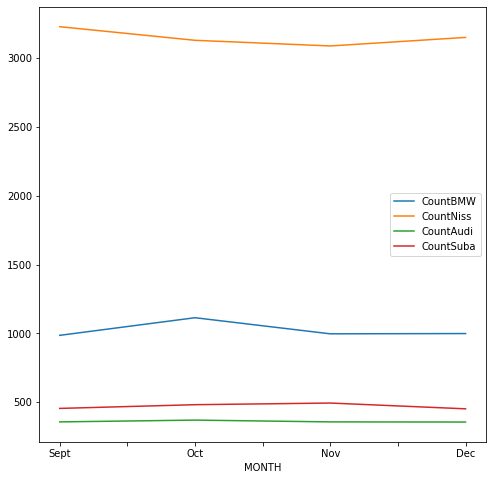

In [198]:
from matplotlib import rcParams
rcParams['figure.figsize']=8,8
q21.plot(kind='line')

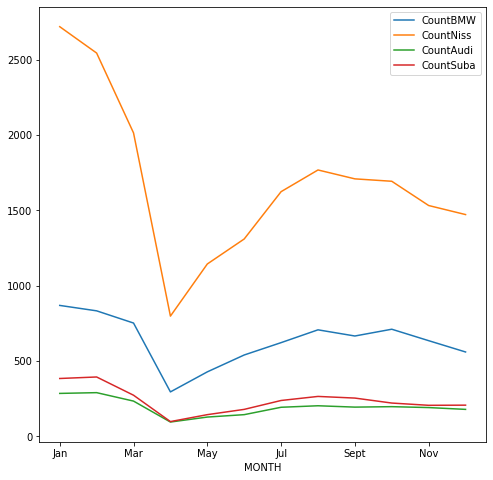

In [199]:
q31.plot()

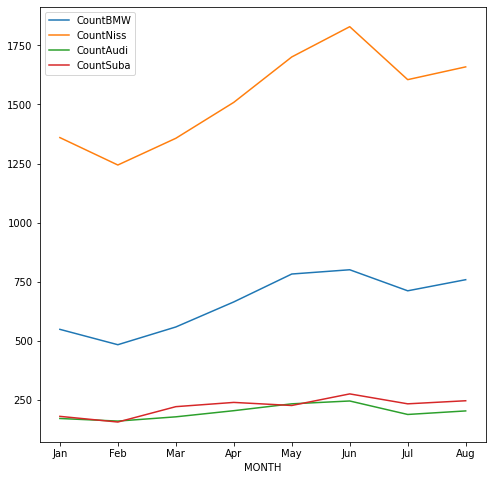

In [200]:
q41.plot()

Query 3: PIECHART

In [201]:
path= "/content/drive/MyDrive/Motor_Vehicle_Collisions_-_Vehicles (1).csv"
org_data = pd.read_csv(path)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [202]:
data_dt= org_data

In [203]:
org_data


,UNIQUE_ID,COLLISION_ID,CRASH_DATE,CRASH_TIME,VEHICLE_ID,STATE_REGISTRATION,VEHICLE_TYPE,VEHICLE_MAKE,VEHICLE_MODEL,VEHICLE_YEAR,...,PRE_CRASH,POINT_OF_IMPACT,VEHICLE_DAMAGE,VEHICLE_DAMAGE_1,VEHICLE_DAMAGE_2,VEHICLE_DAMAGE_3,PUBLIC_PROPERTY_DAMAGE,PUBLIC_PROPERTY_DAMAGE_TYPE,CONTRIBUTING_FACTOR_1,CONTRIBUTING_FACTOR_2
0,10385780,100201,09/07/2012,9:03,1,NY,PASSENGER VEHICLE,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unspecified,NaN
1,19140702,4213082,09/23/2019,8:15,0553ab4d-9500-4cba-8d98-f4d7f89d5856,NY,Station Wagon/Sport Utility Vehicle,TOYT -CAR/SUV,NaN,2002.0,...,Going Straight Ahead,Left Front Bumper,Left Front Quarter Panel,NaN,NaN,NaN,N,NaN,Driver Inattention/Distraction,Unspecified
2,14887647,3307608,10/02/2015,17:18,2,NY,TAXI,NaN,NaN,NaN,...,Going Straight Ahead,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Driver Inattention/Distraction,NaN
3,14889754,3308693,10/04/2015,20:34,1,NY,PASSENGER VEHICLE,NaN,NaN,NaN,...,Parked,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unspecified,NaN
4,14400270,297666,04/25/2013,21:15,1,NY,PASSENGER VEHICLE,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Other Vehicular,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3704401,20107423,4477591,11/15/2021,8:40,beb4bb74-d34d-45ac-9490-98ba62845101,PA,Station Wagon/Sport Utility Vehicle,FORD -CAR/SUV,NaN,2021.0,...,Going Straight Ahead,Right Front Quarter Panel,Right Side Doors,No Damage,No Damage,No Damage,N,NaN,Unspecified,Unspecified
3704402,20116373,4481414,11/24/2021,13:55,973d9175-ebbe-48f9-8a2e-1ae605c34dd2,NY,Station Wagon/Sport Utility Vehicle,CHEV -CAR/SUV,NaN,2012.0,...,Parked,Center Back End,Center Back End,Left Rear Bumper,Left Rear Quarter Panel,NaN,N,NaN,Unspecified,Unspecified
3704403,20105181,4476575,11/11/2021,14:20,3a617316-bf31-4226-8e57-755af0c97706,NJ,Station Wagon/Sport Utility Vehicle,NISS -CAR/SUV,NaN,2007.0,...,Parked,Left Front Quarter Panel,Left Front Quarter Panel,Left Side Doors,Right Front Quarter Panel,NaN,N,NaN,Unspecified,Unspecified
3704404,20101210,4474811,11/06/2021,12:30,b7e355b1-6fb8-47bf-87be-55c0c45282f4,NY,Sedan,FORD -CAR/SUV,NaN,2018.0,...,Going Straight Ahead,Center Front End,Center Front End,Left Front Bumper,Right Front Bumper,Left Front Quarter Panel,N,NaN,Driver Inattention/Distraction,Following Too Closely


In [204]:
data_dt['CRASH_DATE']=pd.to_datetime(data_dt['CRASH_DATE'])


In [205]:
start_date= '2019-09-01'
end_date='2021-08-31'

mvc_data=data_dt.query('CRASH_DATE>= @start_date and CRASH_DATE<=@end_date')
mvc_data.to_csv('/content/drive/MyDrive/MVC_3.csv')

In [206]:
new_data=pd.read_csv('/content/drive/MyDrive/MVC_3.csv')

In [207]:
new_data

,Unnamed: 0,UNIQUE_ID,COLLISION_ID,CRASH_DATE,CRASH_TIME,VEHICLE_ID,STATE_REGISTRATION,VEHICLE_TYPE,VEHICLE_MAKE,VEHICLE_MODEL,...,PRE_CRASH,POINT_OF_IMPACT,VEHICLE_DAMAGE,VEHICLE_DAMAGE_1,VEHICLE_DAMAGE_2,VEHICLE_DAMAGE_3,PUBLIC_PROPERTY_DAMAGE,PUBLIC_PROPERTY_DAMAGE_TYPE,CONTRIBUTING_FACTOR_1,CONTRIBUTING_FACTOR_2
0,1,19140702,4213082,2019-09-23,8:15,0553ab4d-9500-4cba-8d98-f4d7f89d5856,NY,Station Wagon/Sport Utility Vehicle,TOYT -CAR/SUV,NaN,...,Going Straight Ahead,Left Front Bumper,Left Front Quarter Panel,NaN,NaN,NaN,N,NaN,Driver Inattention/Distraction,Unspecified
1,6,19138701,4229067,2019-10-24,13:15,c53b43d9-419a-4ab1-9361-3f2979078d89,NY,Bus,FRHT-TRUCK/BUS,NaN,...,Parked,Left Front Quarter Panel,Left Front Quarter Panel,NaN,NaN,NaN,N,NaN,Unspecified,Unspecified
2,13,19140791,4229563,2019-10-21,17:55,86a294b4-6672-4a7e-8357-39d6d2eff9f7,PA,Sedan,BMW -CAR/SUV,NaN,...,Going Straight Ahead,Center Front End,Right Front Bumper,Right Front Quarter Panel,Right Front Bumper,NaN,N,NaN,Unspecified,Unspecified
3,14,19694316,4322767,2020-06-06,18:30,fdc195a7-8127-4c00-834d-bac78b0cf88e,NaN,Bike,NaN,NaN,...,Going Straight Ahead,Center Front End,No Damage,No Damage,No Damage,No Damage,N,NaN,Traffic Control Disregarded,Unspecified
4,19,19140656,4229538,2019-10-24,17:30,70e5262a-bd27-48a6-99a1-1ec659804088,NY,Station Wagon/Sport Utility Vehicle,JEEP -CAR/SUV,NaN,...,Going Straight Ahead,Left Rear Quarter Panel,Left Rear Quarter Panel,NaN,NaN,NaN,N,NaN,Unspecified,Unspecified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
519485,3703358,20119440,4483137,2020-12-01,17:00,c506ec65-9ead-4d96-9558-f803a369d0f3,NY,Sedan,HOND -CAR/SUV,NaN,...,Parked,Right Front Bumper,Right Front Quarter Panel,Right Front Bumper,Right Front Quarter Panel,Right Front Bumper,N,NaN,Unspecified,Unspecified
519486,3703395,20117944,4482288,2021-08-14,8:21,72dc146c-0a7a-47db-ade2-817939bb151c,PA,Sedan,HOND -CAR/SUV,NaN,...,Going Straight Ahead,Center Front End,Center Front End,Left Front Quarter Panel,No Damage,No Damage,N,NaN,Unspecified,Unspecified
519487,3703534,20119740,4407071,2021-04-13,13:50,26af0548-3858-4b19-bd7f-a8f7cb5f2ca5,NY,Sedan,CHEV -CAR/SUV,NaN,...,Going Straight Ahead,Center Front End,Center Front End,NaN,NaN,NaN,N,NaN,Illnes,Unspecified
519488,3703780,20112133,4479833,2019-11-19,1:50,47038248-eddf-458e-a0e2-02cb7609329c,NaN,NaN,NaN,NaN,...,NaN,Left Front Quarter Panel,NaN,NaN,NaN,NaN,Unspecified,NaN,NaN,NaN


In [208]:
new_data['VEHICLE_TYPE']=new_data['VEHICLE_TYPE'].str.replace(' ','')

In [209]:
new_data

,Unnamed: 0,UNIQUE_ID,COLLISION_ID,CRASH_DATE,CRASH_TIME,VEHICLE_ID,STATE_REGISTRATION,VEHICLE_TYPE,VEHICLE_MAKE,VEHICLE_MODEL,...,PRE_CRASH,POINT_OF_IMPACT,VEHICLE_DAMAGE,VEHICLE_DAMAGE_1,VEHICLE_DAMAGE_2,VEHICLE_DAMAGE_3,PUBLIC_PROPERTY_DAMAGE,PUBLIC_PROPERTY_DAMAGE_TYPE,CONTRIBUTING_FACTOR_1,CONTRIBUTING_FACTOR_2
0,1,19140702,4213082,2019-09-23,8:15,0553ab4d-9500-4cba-8d98-f4d7f89d5856,NY,StationWagon/SportUtilityVehicle,TOYT -CAR/SUV,NaN,...,Going Straight Ahead,Left Front Bumper,Left Front Quarter Panel,NaN,NaN,NaN,N,NaN,Driver Inattention/Distraction,Unspecified
1,6,19138701,4229067,2019-10-24,13:15,c53b43d9-419a-4ab1-9361-3f2979078d89,NY,Bus,FRHT-TRUCK/BUS,NaN,...,Parked,Left Front Quarter Panel,Left Front Quarter Panel,NaN,NaN,NaN,N,NaN,Unspecified,Unspecified
2,13,19140791,4229563,2019-10-21,17:55,86a294b4-6672-4a7e-8357-39d6d2eff9f7,PA,Sedan,BMW -CAR/SUV,NaN,...,Going Straight Ahead,Center Front End,Right Front Bumper,Right Front Quarter Panel,Right Front Bumper,NaN,N,NaN,Unspecified,Unspecified
3,14,19694316,4322767,2020-06-06,18:30,fdc195a7-8127-4c00-834d-bac78b0cf88e,NaN,Bike,NaN,NaN,...,Going Straight Ahead,Center Front End,No Damage,No Damage,No Damage,No Damage,N,NaN,Traffic Control Disregarded,Unspecified
4,19,19140656,4229538,2019-10-24,17:30,70e5262a-bd27-48a6-99a1-1ec659804088,NY,StationWagon/SportUtilityVehicle,JEEP -CAR/SUV,NaN,...,Going Straight Ahead,Left Rear Quarter Panel,Left Rear Quarter Panel,NaN,NaN,NaN,N,NaN,Unspecified,Unspecified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
519485,3703358,20119440,4483137,2020-12-01,17:00,c506ec65-9ead-4d96-9558-f803a369d0f3,NY,Sedan,HOND -CAR/SUV,NaN,...,Parked,Right Front Bumper,Right Front Quarter Panel,Right Front Bumper,Right Front Quarter Panel,Right Front Bumper,N,NaN,Unspecified,Unspecified
519486,3703395,20117944,4482288,2021-08-14,8:21,72dc146c-0a7a-47db-ade2-817939bb151c,PA,Sedan,HOND -CAR/SUV,NaN,...,Going Straight Ahead,Center Front End,Center Front End,Left Front Quarter Panel,No Damage,No Damage,N,NaN,Unspecified,Unspecified
519487,3703534,20119740,4407071,2021-04-13,13:50,26af0548-3858-4b19-bd7f-a8f7cb5f2ca5,NY,Sedan,CHEV -CAR/SUV,NaN,...,Going Straight Ahead,Center Front End,Center Front End,NaN,NaN,NaN,N,NaN,Illnes,Unspecified
519488,3703780,20112133,4479833,2019-11-19,1:50,47038248-eddf-458e-a0e2-02cb7609329c,NaN,NaN,NaN,NaN,...,NaN,Left Front Quarter Panel,NaN,NaN,NaN,NaN,Unspecified,NaN,NaN,NaN


In [210]:
new_data = pd.read_csv('/content/drive/MyDrive/MVC_3.csv')
print(new_data)

        Unnamed: 0  UNIQUE_ID  COLLISION_ID  CRASH_DATE CRASH_TIME  \
0                1   19140702       4213082  2019-09-23       8:15   
1                6   19138701       4229067  2019-10-24      13:15   
2               13   19140791       4229563  2019-10-21      17:55   
3               14   19694316       4322767  2020-06-06      18:30   
4               19   19140656       4229538  2019-10-24      17:30   
...            ...        ...           ...         ...        ...   
519485     3703358   20119440       4483137  2020-12-01      17:00   
519486     3703395   20117944       4482288  2021-08-14       8:21   
519487     3703534   20119740       4407071  2021-04-13      13:50   
519488     3703780   20112133       4479833  2019-11-19       1:50   
519489     3703847   20119741       4407071  2021-04-13      13:50   

                                  VEHICLE_ID STATE_REGISTRATION  \
0       0553ab4d-9500-4cba-8d98-f4d7f89d5856                 NY   
1       c53b43d9-419a-4ab

In [211]:
# Create new pandas DataFrame.
new_data = new_data[['VEHICLE_TYPE']]

In [212]:
XYZ=list(new_data['VEHICLE_TYPE'].unique())

In [213]:
for i in XYZ:
  print(i)


Station Wagon/Sport Utility Vehicle
Bus
Sedan
Bike
nan
4 dr sedan
Box Truck
Taxi
School Bus
Pick-up Truck
Motorcycle
Flat Bed
Van
E-Sco
Dump
Convertible
Tractor Truck Diesel
Carry All
Motorbike
Refrigerated Van
PSH
E-Bik
Golf
Tow Truck / Wrecker
COM
AMBULANCE
Garbage or Refuse
trail
BACKH
Armored Truck
flat
Pickup with mounted Camper
PK
Ambulance
E-Scooter
DUMP
TRAC
Beverage Truck
E-Bike
FIRETRUCK
VAN/TRANSI
Tractor Truck Gasoline
Moped
UNKNOWN
SCOOTER
Pick up Tr
Multi-Wheeled Vehicle
DIRT BIKE
FIRET TRUC
Delivery t
Tanker
Motorscooter
Concrete Mixer
TRAILOR
CAT
LIMO
Fire Truck
motorcycle
TRAILER
forklift
ICE CREAM
FIRE TRUCK
CARGO VAN
Minicycle
E-SCOOTER
Lift Boom
3-Door
SPRIN
Trailer
schoo
AMBU
Open Body
Stake or Rack
scoot
ambulance
Chassis Cab
TRAIL
TRK
SCHOO
MOPED
AMB
Flat Rack
TOW T
Bulk Agriculture
Minibike
van
excav
FIRE
mack
FDNY
COMME
Box T
UT
FDNY AMBUL
Fire
MOBIL
Hopper
COMMERCIAL
TRUCK
Forkl
Pedicab
MOBILE
NYC F
comme
GOLF
UNK
FIRET
RD/S
deliv
FRONT
Ambul
Pick
Vanette
FORK

In [214]:
new_data.value_counts()

VEHICLE_TYPE                       
Sedan                                  210252
Station Wagon/Sport Utility Vehicle    166351
Taxi                                    14755
Pick-up Truck                           12152
Bike                                    10400
                                        ...  
MOBIL                                       1
MOBILE                                      1
MOPAD                                       1
MOPED SCOO                                  1
yellow cab                                  1
Length: 1025, dtype: int64

In [215]:
new_data=new_data.dropna(subset=['VEHICLE_TYPE'])

In [216]:
new_data['VEHICLE_TYPE'] = new_data['VEHICLE_TYPE'].str.upper()

In [217]:
print(new_data)

                               VEHICLE_TYPE
0       STATION WAGON/SPORT UTILITY VEHICLE
1                                       BUS
2                                     SEDAN
3                                      BIKE
4       STATION WAGON/SPORT UTILITY VEHICLE
...                                     ...
519483                        PICK-UP TRUCK
519485                                SEDAN
519486                                SEDAN
519487                                SEDAN
519489                                SEDAN

[463564 rows x 1 columns]


In [218]:
new_data = new_data[new_data['VEHICLE_TYPE'].str.contains('(SEDAN|PASSENGER|SPORT|STATION|TAXI|VAN|BUS|BIKE|TRUCK|MOTORCYCLE|BICYCLE)', regex=True)]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


In [219]:
print(new_data)


                               VEHICLE_TYPE
0       STATION WAGON/SPORT UTILITY VEHICLE
1                                       BUS
2                                     SEDAN
3                                      BIKE
4       STATION WAGON/SPORT UTILITY VEHICLE
...                                     ...
519483                        PICK-UP TRUCK
519485                                SEDAN
519486                                SEDAN
519487                                SEDAN
519489                                SEDAN

[447846 rows x 1 columns]


In [220]:
print(new_data['VEHICLE_TYPE'].unique())

['STATION WAGON/SPORT UTILITY VEHICLE' 'BUS' 'SEDAN' 'BIKE' '4 DR SEDAN'
 'BOX TRUCK' 'TAXI' 'SCHOOL BUS' 'PICK-UP TRUCK' 'MOTORCYCLE' 'VAN'
 'TRACTOR TRUCK DIESEL' 'MOTORBIKE' 'REFRIGERATED VAN'
 'TOW TRUCK / WRECKER' 'ARMORED TRUCK' 'BEVERAGE TRUCK' 'E-BIKE'
 'FIRETRUCK' 'VAN/TRANSI' 'TRACTOR TRUCK GASOLINE' 'DIRT BIKE'
 'FIRE TRUCK' 'CARGO VAN' 'MINIBIKE' 'TRUCK' 'VANETTE' 'FDNY TRUCK'
 'MAIL TRUCK' '2 DR SEDAN' 'UPS TRUCK' 'PICK TRUCK' 'VAN CAMPER'
 'USPS TRUCK' 'TOW TRUCK' 'MOVING VAN' 'VAN/T' 'VAN A' 'EMS TRUCK'
 'NYC BUS' 'USPS VAN' 'VAN T' 'FOOD TRUCK' 'DUMP TRUCK' 'MTA TRUCK'
 'TRUCK FLAT' 'WORK VAN' 'DIRTBIKE' 'FORD VAN' 'TRUCK TRAI' 'TRUCK VAN'
 'TRANSPORT' 'MINI VAN' 'FIRTRUCK' 'MAILTRUCK' 'BICYCLE' 'POSTAL VAN'
 'EBIKE' 'TRUCK CRAN' 'VAN TRUCK' 'VAN FORD' 'UHAUL VAN' 'PASSENGER'
 'VAN/TRUCK' 'MTA BUS' 'BLU BUS' 'SCHOOLBUS' 'OMNIBUS' 'DEPT VAN #'
 'E BIKE' 'FD TRUCK' 'RV/VAN' 'TOWE TRUCK' 'TOUR BUS' 'DOT TRUCK'
 'SHORT BUS' 'POSTAL BUS' 'INTE TRUCK' 'EMS/VAN' 'MARKED VAN' '

In [221]:
new_data["VEHICLE_TYPE"].replace({"4 DR SEDAN": "SEDANS", "2 DR SEDAN": "SEDANS", "SEDAN": "SEDANS", "SPORT UTILITY / STATION WAGON": "SPORT UTILITY VEHICLE", "PASSENGER":"PASSENGER VEHICLE","STATION WAGON/SPORT UTILITY VEHICLE": "SPORT UTILITY VEHICLE", "PICK-UP TRUCK": "TRUCK", "BOX TRUCK": "TRUCK"}, inplace=True)

In [222]:
print(new_data['VEHICLE_TYPE'].unique())

['SPORT UTILITY VEHICLE' 'BUS' 'SEDANS' 'BIKE' 'TRUCK' 'TAXI' 'SCHOOL BUS'
 'MOTORCYCLE' 'VAN' 'TRACTOR TRUCK DIESEL' 'MOTORBIKE' 'REFRIGERATED VAN'
 'TOW TRUCK / WRECKER' 'ARMORED TRUCK' 'BEVERAGE TRUCK' 'E-BIKE'
 'FIRETRUCK' 'VAN/TRANSI' 'TRACTOR TRUCK GASOLINE' 'DIRT BIKE'
 'FIRE TRUCK' 'CARGO VAN' 'MINIBIKE' 'VANETTE' 'FDNY TRUCK' 'MAIL TRUCK'
 'UPS TRUCK' 'PICK TRUCK' 'VAN CAMPER' 'USPS TRUCK' 'TOW TRUCK'
 'MOVING VAN' 'VAN/T' 'VAN A' 'EMS TRUCK' 'NYC BUS' 'USPS VAN' 'VAN T'
 'FOOD TRUCK' 'DUMP TRUCK' 'MTA TRUCK' 'TRUCK FLAT' 'WORK VAN' 'DIRTBIKE'
 'FORD VAN' 'TRUCK TRAI' 'TRUCK VAN' 'TRANSPORT' 'MINI VAN' 'FIRTRUCK'
 'MAILTRUCK' 'BICYCLE' 'POSTAL VAN' 'EBIKE' 'TRUCK CRAN' 'VAN TRUCK'
 'VAN FORD' 'UHAUL VAN' 'PASSENGER VEHICLE' 'VAN/TRUCK' 'MTA BUS'
 'BLU BUS' 'SCHOOLBUS' 'OMNIBUS' 'DEPT VAN #' 'E BIKE' 'FD TRUCK' 'RV/VAN'
 'TOWE TRUCK' 'TOUR BUS' 'DOT TRUCK' 'SHORT BUS' 'POSTAL BUS' 'INTE TRUCK'
 'EMS/VAN' 'MARKED VAN' 'PLOW TRUCK' 'MTA BUS 4' 'SCHOOL VAN' 'SW/VAN'
 'UNI E-BIKE' 

In [223]:
def Clean_names(VEHICLE_TYPE):
  if VEHICLE_TYPE in ['SEDANS','VAN','BIKE','BUS','TAXI','SPORT UTILITY VEHICLE','PASSENGER VEHICLE','TRUCK','MOTORCYCLE','BICYCLE']:
      return VEHICLE_TYPE
  else:
      return None

In [224]:
# Update the vehicle_make columns
new_data['VEHICLE_TYPE'] = new_data['VEHICLE_TYPE'].apply(Clean_names)

In [225]:
print(new_data)

                 VEHICLE_TYPE
0       SPORT UTILITY VEHICLE
1                         BUS
2                      SEDANS
3                        BIKE
4       SPORT UTILITY VEHICLE
...                       ...
519483                  TRUCK
519485                 SEDANS
519486                 SEDANS
519487                 SEDANS
519489                 SEDANS

[447846 rows x 1 columns]


In [226]:
print(new_data['VEHICLE_TYPE'].unique())

['SPORT UTILITY VEHICLE' 'BUS' 'SEDANS' 'BIKE' 'TRUCK' 'TAXI' None
 'MOTORCYCLE' 'VAN' 'BICYCLE' 'PASSENGER VEHICLE']


In [227]:
print(new_data)

                 VEHICLE_TYPE
0       SPORT UTILITY VEHICLE
1                         BUS
2                      SEDANS
3                        BIKE
4       SPORT UTILITY VEHICLE
...                       ...
519483                  TRUCK
519485                 SEDANS
519486                 SEDANS
519487                 SEDANS
519489                 SEDANS

[447846 rows x 1 columns]


In [228]:
new_data=new_data.dropna(subset=['VEHICLE_TYPE'])

In [229]:
print(new_data)

                 VEHICLE_TYPE
0       SPORT UTILITY VEHICLE
1                         BUS
2                      SEDANS
3                        BIKE
4       SPORT UTILITY VEHICLE
...                       ...
519483                  TRUCK
519485                 SEDANS
519486                 SEDANS
519487                 SEDANS
519489                 SEDANS

[438704 rows x 1 columns]


In [230]:
new_data.insert(1,'counter','1')

In [231]:
new_data

,VEHICLE_TYPE,counter
0,SPORT UTILITY VEHICLE,1
1,BUS,1
2,SEDANS,1
3,BIKE,1
4,SPORT UTILITY VEHICLE,1
...,...,...
519483,TRUCK,1
519485,SEDANS,1
519486,SEDANS,1
519487,SEDANS,1


In [232]:
new_data.groupby(['VEHICLE_TYPE'])[['counter']].count()

,counter
VEHICLE_TYPE,
BICYCLE,1
BIKE,10400
BUS,7098
MOTORCYCLE,3328
PASSENGER VEHICLE,7
SEDANS,210948
SPORT UTILITY VEHICLE,166351
TAXI,14755
TRUCK,22683


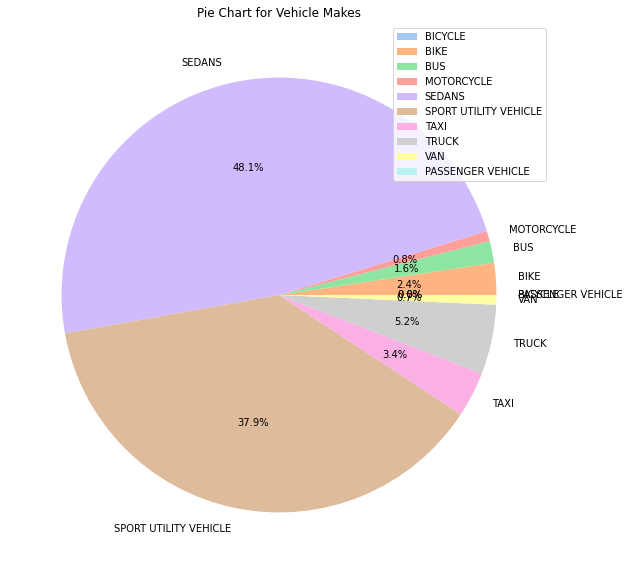

In [233]:
# Creating dataset
VEHICLE_TYPE = ['BICYCLE','BIKE',
        'BUS', 'MOTORCYCLE', 'SEDANS','SPORT UTILITY VEHICLE','TAXI','TRUCK','VAN','PASSENGER VEHICLE']
 
data = ['1','10400','7098','3328','210948','166351','14755','22683','3133','7']

palette_color = seaborn.color_palette('pastel')

 
# Creating plot
fig = plt.figure(figsize =(20, 10))
plt.pie(data,autopct='%1.1f%%',labels = VEHICLE_TYPE, colors=palette_color)
plt.title('Pie Chart for Vehicle Makes')
plt.legend()
# show plot
plt.show()

ANALYSIS 

In [234]:
q2019=q21

In [235]:
#finding the average value per month for the year 2019
countBmw19=q2019['CountBMW'].sum()
avgBmw19=countBmw19/4
countAudi19=q2019['CountAudi'].sum()
avgAudi19=countAudi19/4
countNiss19=q2019['CountNiss'].sum()
avgNiss19=countNiss19/4
countSuba19=q2019['CountSuba'].sum()
avgSuba19=countSuba19/4

In [236]:
q2020=q31

In [237]:
#finding the average value per month for the year 2020
countBmw20=q2020['CountBMW'].sum()
avgBmw20=countBmw20/4
countAudi20=q2020['CountAudi'].sum()
avgAudi20=countAudi20/4
countNiss20=q2020['CountNiss'].sum()
avgNiss20=countNiss20/4
countSuba20=q2020['CountSuba'].sum()
avgSuba20=countSuba20/4

In [238]:
q2021=q41

In [239]:
#finding the average value per month for the year 2021
countBmw21=q2021['CountBMW'].sum()
avgBmw21=countBmw21/4
countAudi21=q2021['CountAudi'].sum()
avgAudi21=countAudi21/4
countNiss21=q2021['CountNiss'].sum()
avgNiss21=countNiss21/4
countSuba21=q2021['CountSuba'].sum()
avgSuba21=countSuba21/4

In [240]:
CountAverage2019={countBmw19:avgBmw19,countAudi19:avgAudi19,countNiss19:avgNiss19,countSuba19:avgSuba19}

In [241]:
print(CountAverage2019)

{4096: 1024.0, 1440: 360.0, 12599: 3149.75, 1883: 470.75}


In [242]:
CountAverage2020={countBmw20:avgBmw20,countAudi20:avgAudi20,countNiss20:avgNiss20,countSuba20:avgSuba20}

In [243]:
print(CountAverage2020)

{7630: 1907.5, 2345: 586.25, 20339: 5084.75, 2875: 718.75}


In [244]:
CountAverage2021={countBmw21:avgBmw21,countAudi21:avgAudi21,countNiss21:avgNiss21,countSuba21:avgSuba21}

In [245]:
print(CountAverage2021)

{5312: 1328.0, 1590: 397.5, 12264: 3066.0, 1784: 446.0}
